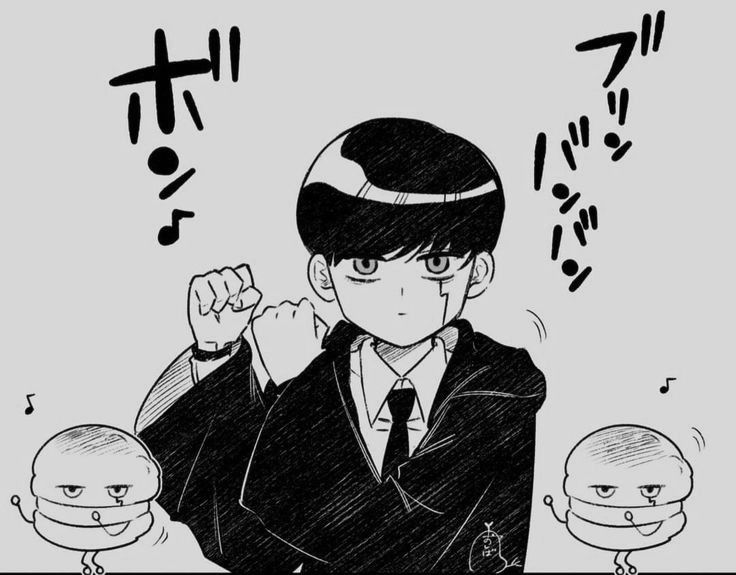

<ipython-input-3-c0b9433e3afc>:25: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.flatten(), 256, [0, 256], color='r', alpha=0.5)


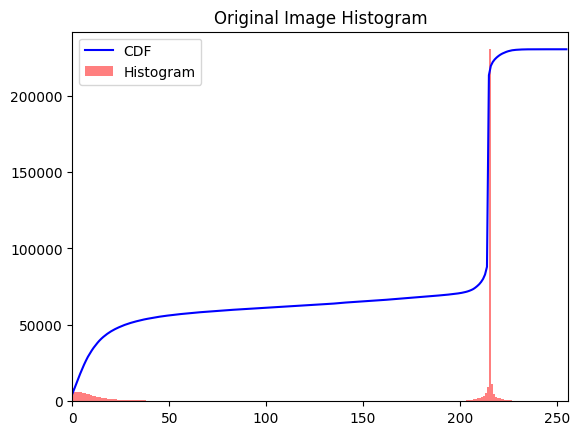

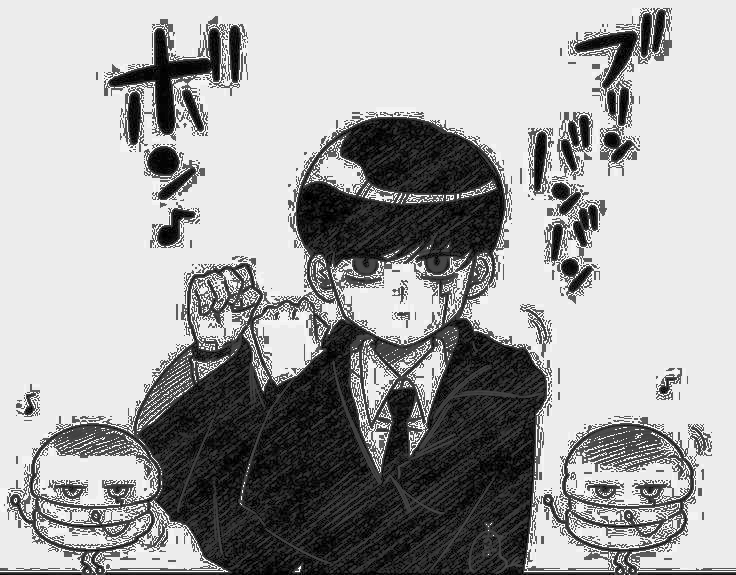

<ipython-input-3-c0b9433e3afc>:45: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equ.flatten(), 256, [0, 256], color='r', alpha=0.5)


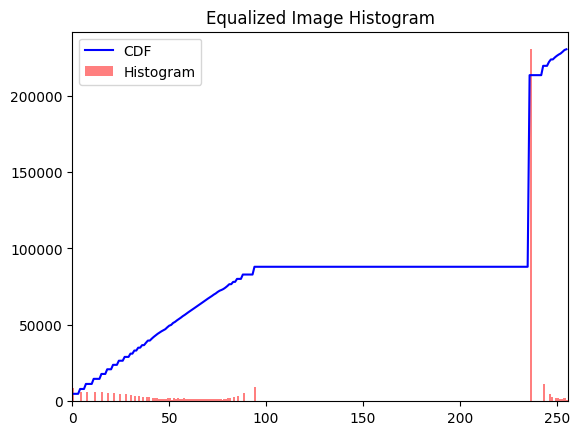

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow  # Only for Google Colab

# Load the grayscale image
path = "/content/mashle1.jpg"
img = cv.imread(path, cv.IMREAD_GRAYSCALE)

# Check if image is loaded correctly
if img is None:
    print("Error: Image not found or could not be loaded.")
else:
    # Show the original image
    cv2_imshow(img)  # Use cv.imshow() if not in Colab

    # Compute histogram and CDF
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()

    # Plot original histogram and CDF
    plt.figure()
    plt.plot(cdf_normalized, color='b')
    plt.hist(img.flatten(), 256, [0, 256], color='r', alpha=0.5)
    plt.xlim([0, 256])
    plt.legend(('CDF', 'Histogram'), loc='upper left')
    plt.title("Original Image Histogram")
    plt.show()

    # Apply Histogram Equalization
    equ = cv.equalizeHist(img)

    # Show the equalized image
    cv2_imshow(equ)  # Use cv.imshow() if not in Colab

    # Compute histogram and CDF for equalized image
    hist_eq, bins_eq = np.histogram(equ.flatten(), 256, [0, 256])
    cdf_eq = hist_eq.cumsum()
    cdf_normalized_eq = cdf_eq * float(hist_eq.max()) / cdf_eq.max()

    # Plot equalized histogram and CDF
    plt.figure()
    plt.plot(cdf_normalized_eq, color='b')
    plt.hist(equ.flatten(), 256, [0, 256], color='r', alpha=0.5)
    plt.xlim([0, 256])
    plt.legend(('CDF', 'Histogram'), loc='upper left')
    plt.title("Equalized Image Histogram")
    plt.show()
